4.Model Development

1. รหัส ชื่อ และหมู่ของนิสิตในกลุ่ม
- 6610402167 นายพงษ์ศิริ กิตตยุทธนาวิน หมู่ 1
- 6610402060 นายธนกฤต ตระการจันทร์ หมู่ 1
2. วัตถุประสงค์ของระบบต้นแบบ
- ทำนายความพึงพอใจของผู้ใช้ จากรีวิวของผู้ใช้เอง
3. ลิงค์ไปยังข้อมูลที่จะใช้ในระบบต้นแบบ
- Data set: https://amazon-reviews-2023.github.io/
4. ปั​ญห​า ML ของตั​วเอ​งเป็นปั​ญหา​ป​ระเภ​ทใด (classificati​on/regres​sion/clust​ering/ge​neration)
- Multi-class classification
5. f​eat​ur​es ที่ใช้ในการทำนา​ยมีอะ​ไรบ้าง
- column "Review" ที่เป็นการรวมกันของ "title" กับ "text" ซึ้งเป็นข้อความรีวิวของผู้ใช้
6. เฉ​ลย (label) ที่ต้​องกา​รทำนา​ยคื​ออ​ะไร
- เดิมคือคะแนนรีวิวของผู้ใช้ "rating"
- แต่ด้วยแต่ละระดับคะแนนมีข้อมูลที่ไม่เท่ากันจึงได้ทำการ handle labelling ยุบแต่ละระดับ rating เป็นช่วงความรู้สึกผู้ใช้ "sentiment" ที่ประกอบด้วย Negative, Neutral ,Positive
7. ระบบของตัวเองสาม​ารถใช้ al​gorith​m อะไรได้บ้าง เพ​ราะเห​ตุใด
- Model : LogisticRegression เพราะปัญหานี้ต้องการทำการ clssified แบบ multiclass ซึ่ง LogisticRegression เป็น Algorithm ที่ประยุกต์ใช้หลักการของ Regression เพียงแต่ใช้ได้กับปัญหา multi-class และยังเป็นโมเดลพื้นฐานที่ง่ายในการ Implement และ ใช้เวลาในการ Train น้อย
- Model: KNeighborsClassifier ใช้อัลกอริทึม k-nearest neighbors vote เนื่องจากปัญหาของเราสามารถตรวจสอบการกระจุกตัวของระดับ sentiment ได้ ทำให้ classified ได้ง่ายหากตรวจสอบกับจำนวนเพื่อนบ้านที่มากพอ
- Model: Multinomial Naive Bayes ใช้หลักการของ Naive Bayes ที่เลือกใช้เพราะโมเดลนี้ทำงานได้ดีกับ features ที่ไม่ต่อเนื่องอย่างเช่นข้อความ
- Model: LinearSVC เป็น support vector machine ที่เลือกใช้เพราะโมเดลนี้สเกลได้ดีกับข้อมูลที่มี sample เยอะๆ
- Model: RandomForestClassifier  ที่เลือกใช้เพราะใช้หลักการของ decision tree ในการ classified ซึ่งเรายังไม่เคยลองใช้ และโมเดลนี้มีค่า hyperparameter ที่เราปรับแต่งได้เยอะ
8. แต่ละ algor​ithm มี hype​rpar​am​eter อะไ​รบ้าง ปรับเป็​นอะไรไ​ด้บ้าง
- LogisticRegression: ค่า c (Inverse ของ regularization strength) เป็นค่าทศนิยมที่มากกว่า 0
- KNeighborsClassifier: ค่า n_neighbors (จำนวนเพื่อนบ้านที่ใช้อ้างอิง) เป็นค่าจำนวนเต็มที่มากกว่า 0
- MultinomialNB: ค่า alpha (smoothing paramete) เป็นได้ตั้งแต่ 0 คือไม่ smooth เลยจนไปถึงเลขใดก็ได้ที่เป็นจำนวนเต็ม
- LinearSVC: ค่า c (Regularization parameter) ต้องเป็นจำนวนจริงบวก
- RandomForestClassifier: 
   1. n_estimators (จำนวน tree ใน forest) int, default=100
   2. max_depth (ความลึกสูงสุดของ tree) int, default=None
   3. min_samples_split (จำนวนตัวอย่างขั้นต่ำที่จำเป็นสำหรับการแยกโหนดภายใน) int or float, default=2
   4. min_samples_leaf (จำนวนตัวอย่างขั้นต่ำที่ต้องอยู่ที่โหนดปลายสุด จุดแยกที่ความลึกใดๆ) int or float, default=1
9. คำตอบที่ได้จากการทำนายของ model เบื้องต้นปกติหรือไม่ อย่างไร ต้องมีการ p​os​t-p​roc​ess หรือไม่ อย่างไร
- ปกติ การทำนายของ model ขึ้นอยู่กับจำนวน Data ที่ได้รับซึ่ง sample ของ Negative และ Neutral มีน้อยทำให้ model ยังทำนาย 2 label นี้ได้ไม่ดีนัก อีกทั้งข้อมูลนี้ยังไม่ได้นำความคิดเห็นที่สวนทางกลับคะแนนรีวิวออกเช่นรีวิวว่าดีแต่ให้คะแนน้อย หรือรีวิวว่าไม่ดีแต่ให้คะแนนเยอะเป็นต้น
10. ปร​ะเด็น​อื่น ๆ ที่เกี่ยว​ข้องกั​บข้อมูลของ​ตัวเอง
- ข้อมูลนี้ยังคงมี bias ที่มาจากตัวข้อมูลเอง (รีวิวของผู้ใช้)
- ข้อมูลนี้เป็นรีวิวผลิตภันฑ์ประเภท software เท่านั้น
11. ก​าร​มีส่วน​ร่วมของสม​าชิกแต่ละ​คนในกลุ่ม (แต่ล​ะคนทำอะไรบ้าง)
- นายพงษ์ศิริ PreparData ทำโมเดล LogisticRegression, KNeighborsClassifier, RandomForestClassifier
- นายธนกฤต Handle imbalacne ทำโมเดล MultinomialNB, LinearSVC การ plot virsual ต่างๆ
12. กา​รเปิ​ดเผ​ยกา​รใช้เค​รื่อ​งมือปัญ​ญาป​ระดิษฐ์ (ใช้อะไร ใช้เพื่ออะไร ใช้อย่างไร, pro​mpt อย่างไร)
- ใช้เพื่อลบข้อมูลที่เป็น emoji ออก promt(regex for replace all emoji)

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# data preprocessing
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes  import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.metrics import classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pongs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pongs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pongs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("software-text.csv")
df.head()

,Unnamed: 0,rating,helpful_vote,title,text,Review,transform_text
0,1,5.0,0,Lots of Fun,I love playing tapped out because it is fun to...,Lots of Fun I love playing tapped out because ...,lot fun love play tap fun watch town grow earn...
1,2,5.0,0,Light Up The Dark,I love this flashlight app! It really illumin...,Light Up The Dark I love this flashlight app! ...,light dark love flashlight app really illumina...
2,3,4.0,0,Fun game,One of my favorite games,Fun game One of my favorite games,fun game one favorite game
3,4,4.0,0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,I am not that good at it but my kids are Cute ...,good kid cute game good kid love nik wallenda
4,5,4.0,0,good game,"Made me think , variety of the puzzles kept it...","good game Made me think , variety of the puzzl...",good game make think variety puzzle keep fun p...


# Preparing Data for Machine Learning

In [4]:
df = pd.read_csv("Software.csv")
df.head()

,user_id,rating,helpful_vote,title,text,verified_purchase
0,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1.0,0,malware,mcaffee IS malware,False
1,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,5.0,0,Lots of Fun,I love playing tapped out because it is fun to...,True
2,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,5.0,0,Light Up The Dark,I love this flashlight app! It really illumin...,True
3,AH6CATODIVPVUOJEWHRSRCSKAOHA,4.0,0,Fun game,One of my favorite games,True
4,AEINY4XOINMMJCK5GZ3M6MMHBN6A,4.0,0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,True


In [5]:
df = df[df['verified_purchase']][['rating', 'helpful_vote', 'title', 'text']]

In [6]:
df = df.dropna()
df.isna().any()

rating          False
helpful_vote    False
title           False
text            False
dtype: bool

## รวม Column title และ text เข้าด้วยกันเพื่อให้ง่ายต่อการทำ Vectorisation 

In [7]:
df['Review'] = df['title'] + ' ' + df['text']
df.head()

,rating,helpful_vote,title,text,Review
1,5.0,0,Lots of Fun,I love playing tapped out because it is fun to...,Lots of Fun I love playing tapped out because ...
2,5.0,0,Light Up The Dark,I love this flashlight app! It really illumin...,Light Up The Dark I love this flashlight app! ...
3,4.0,0,Fun game,One of my favorite games,Fun game One of my favorite games
4,4.0,0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,I am not that good at it but my kids are Cute ...
5,4.0,0,good game,"Made me think , variety of the puzzles kept it...","good game Made me think , variety of the puzzl..."


## Engineered Feature
- จากครั้งก่อนๆ มามีปัญหาที่ข้อความมี emoji, html-tag, extra space, web-url, อักขระพิเศษ ปนเข้ามาครั้งนี้จึงแก้ไขอย่างละเอียด

In [9]:
stop_words = set(stopwords.words("english"))
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U00010000-\U0010ffff"
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF" 
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def data_processing(text):
    text = re.sub(r"<[^>]+>", "", text, flags=re.MULTILINE) # Remove html tags
    text = text.lower()  # Converting the entire text in the reviews to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Removing web-url
    text = re.sub(r'\S+@\S', '', text)  # Removing the emails from reviews
    text = re.sub(r'\d+', '', text)  # Removing the digits from reviews
    text = text.strip()  # removing extra space from the reviews
    text = remove_emoji(text)  # Removing emojis
    text = re.sub(r'[^\w\s]', '', text)  # remove all the punctuations from the reviews
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

# Apply data processing function to 'Review' column
df['transform_text'] = df['Review'].apply(data_processing)
df.head()

,rating,helpful_vote,title,text,Review,transform_text
1,5.0,0,Lots of Fun,I love playing tapped out because it is fun to...,Lots of Fun I love playing tapped out because ...,lots fun love playing tapped fun watch town gr...
2,5.0,0,Light Up The Dark,I love this flashlight app! It really illumin...,Light Up The Dark I love this flashlight app! ...,light dark love flashlight app really illumina...
3,4.0,0,Fun game,One of my favorite games,Fun game One of my favorite games,fun game one favorite games
4,4.0,0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,I am not that good at it but my kids are Cute ...,good kids cute game good kids love nik wallenda
5,4.0,0,good game,"Made me think , variety of the puzzles kept it...","good game Made me think , variety of the puzzl...",good game made think variety puzzles kept fun ...


In [10]:
# Function for cleaning the text Data
def cleaning(text):
    clean_text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]

    # Lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)
# Apply cleaning function to 'Clean_Review' column
df['transform_text'] = df['transform_text'].apply(cleaning)

In [11]:
df.head()

,rating,helpful_vote,title,text,Review,transform_text
1,5.0,0,Lots of Fun,I love playing tapped out because it is fun to...,Lots of Fun I love playing tapped out because ...,lot fun love play tap fun watch town grow earn...
2,5.0,0,Light Up The Dark,I love this flashlight app! It really illumin...,Light Up The Dark I love this flashlight app! ...,light dark love flashlight app really illumina...
3,4.0,0,Fun game,One of my favorite games,Fun game One of my favorite games,fun game one favorite game
4,4.0,0,I am not that good at it but my kids are,Cute game. I am not that good at it but my kid...,I am not that good at it but my kids are Cute ...,good kid cute game good kid love nik wallenda
5,4.0,0,good game,"Made me think , variety of the puzzles kept it...","good game Made me think , variety of the puzzl...",good game make think variety puzzle keep fun p...


In [7]:
df.isna().any(axis=1).value_counts()
df = df.dropna()
df.isna().any(axis=1).value_counts()

False    4635935
Name: count, dtype: int64

## Handle labeling
- จะเห็นว่าคะแนนรีวิว 1-5 ในข้อมูลของเรานั้นไม่ balance เช่นมีคนที่ให้คะแนน 2 ดาว น้อยมากๆ
- ดังนั้นเราจึงจะยุบรวมคะแนนต่างๆ เข้าด้วยกันตามช่วงที่ยังสื่อความรู้สึกของผู้รีวิวได้อยู่ (Sentiment) ทั้งนี้ก็เพื่อให้โมเดลของเราทำนายได้มีประสิทธิภาพมากขึ้นเมื่อเจอข้อมูลที่คาบเกี่ยวช่วงคะแนนกัน
- นั่นคือ
- 1-2 เป็น Negative
- 3 เป็น Neutral
- 4-5 เป็น Positive

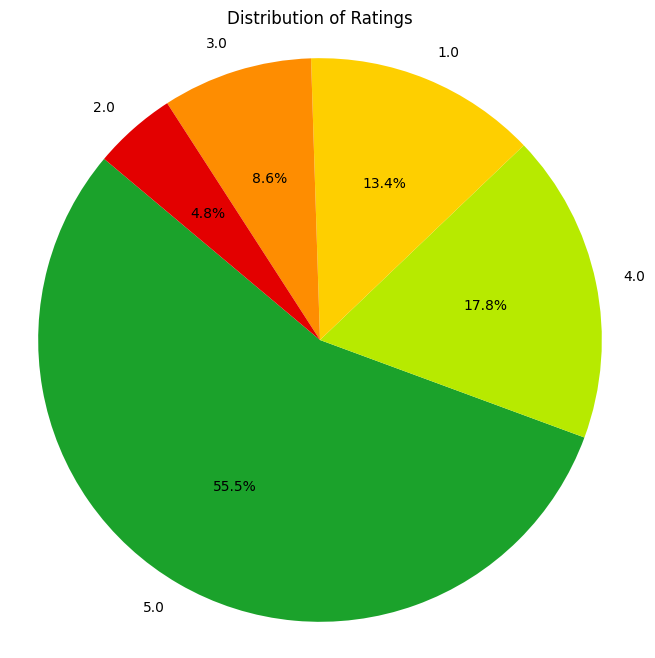

In [8]:
# Plotting the distribution of ratings as a pie chart
plt.figure(figsize=(8, 8))
labels = df['rating'].value_counts().index
sizes = df['rating'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#1ba22b', '#b7ea00', '#fecf00', '#fe8d01', '#e30000'])
plt.title('Distribution of Ratings')
plt.axis('equal') 
plt.show()

In [9]:
#  Sentiment Analysis it categorizes the ratings into sentiment labels ('Positive', 'Negative', or 'Neutral')
df['Sentiment'] = df['rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative' if x <= 2 else 'Neutral')
df['Sentiment'].value_counts()

Sentiment
Positive    3395765
Negative     840755
Neutral      399415
Name: count, dtype: int64

## Vectorization train test split

In [6]:
# Random data for test model
data = df.sample(n=100_000,random_state=123)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3571354 to 870538
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rating          100000 non-null  float64
 1   helpful_vote    100000 non-null  int64  
 2   text            100000 non-null  object 
 3   Review          100000 non-null  object 
 4   transform_text  100000 non-null  object 
 5   Sentiment       100000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.3+ MB


In [7]:
data['Sentiment'].value_counts()

Sentiment
Positive    73215
Negative    18206
Neutral      8579
Name: count, dtype: int64

In [8]:
# Split the data into X and Y
X = data['transform_text']
Y = data['Sentiment']

# Vectorizing the text data
vect = TfidfVectorizer()
X = vect.fit_transform(data['transform_text'])

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

# Encoding the target variable
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

## Handling imbalanced data: Use Oversampling

array([14683,  6891, 58426])

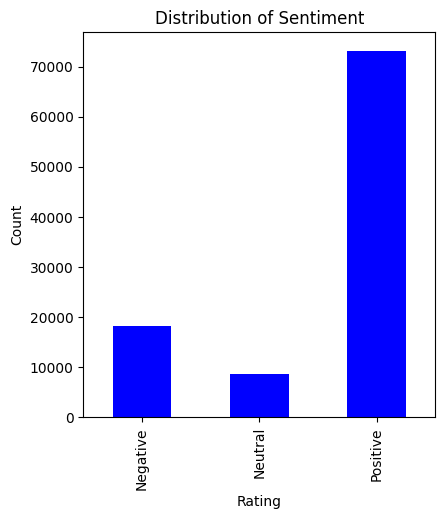

In [14]:
# Plotting the distribution of ratings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['Sentiment'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribution of Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
np.bincount(y_train)

In [9]:
# Checking class distribution before and after oversampling
print("Before sampling class distribution:", Counter(y_train))
ros = RandomOverSampler()
ros_X_train, ros_y_train = ros.fit_resample(x_train, y_train)
print("After sampling class distribution:", Counter(ros_y_train))

Before sampling class distribution: Counter({np.int64(2): 58426, np.int64(0): 14683, np.int64(1): 6891})
After sampling class distribution: Counter({np.int64(2): 58426, np.int64(0): 58426, np.int64(1): 58426})


# Model Building

## Logistic Regression

In [16]:
# hyperparameter test
c_list = [0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

for c in c_list:
    logistic_reg=LogisticRegression(C=c,random_state=0)
    logistic_reg.fit(ros_X_train,ros_y_train)
    logistic_reg_pred=logistic_reg.predict(x_test)
    logistic_reg_acc=accuracy_score(logistic_reg_pred,y_test)
    print(f"Test accuracy of hyperparameter c = {c} : {logistic_reg_acc * 100:.2f}%")

Test accuracy of hyperparameter c = 0.01 : 78.25%
Test accuracy of hyperparameter c = 0.1 : 80.23%
Test accuracy of hyperparameter c = 0.5 : 81.04%
Test accuracy of hyperparameter c = 1 : 80.75%
Test accuracy of hyperparameter c = 5 : 79.83%
Test accuracy of hyperparameter c = 10 : 80.14%
Test accuracy of hyperparameter c = 50 : 79.64%
Test accuracy of hyperparameter c = 100 : 80.66%


Test accuracy: 80.97%


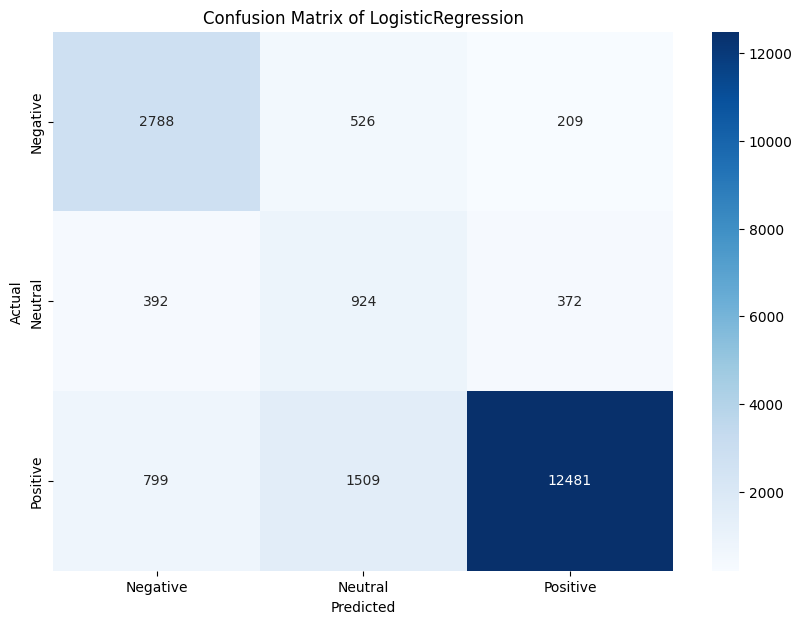

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      3523
           1       0.31      0.55      0.40      1688
           2       0.96      0.84      0.90     14789

    accuracy                           0.81     20000
   macro avg       0.66      0.73      0.68     20000
weighted avg       0.86      0.81      0.83     20000



In [14]:
logistic_reg=LogisticRegression(C=1)
logistic_reg.fit(ros_X_train,ros_y_train)
logistic_reg_pred=logistic_reg.predict(x_test)
logistic_reg_acc=accuracy_score(logistic_reg_pred,y_test)

print("Test accuracy: {:.2f}%".format(logistic_reg_acc*100))

# Plot confusion matrix
cm = confusion_matrix(y_test, logistic_reg_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

print(classification_report(y_test,logistic_reg_pred))

## KNN Model

In [17]:

# hyperparameter test
n_neighbors_list = [1, 5, 10, 50, 100, 500, 1000]

for n in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(ros_X_train, ros_y_train)
    knn_pred = knn.predict(x_test)
    knn_acc = accuracy_score(knn_pred, y_test)
    print(f"Test accuracy of hyperparameter  n_neighbors = {n} : {knn_acc * 100:.2f}%")

Test accuracy of hyperparameter  n_neighbors = 1 : 60.68%
Test accuracy of hyperparameter  n_neighbors = 5 : 49.58%
Test accuracy of hyperparameter  n_neighbors = 10 : 44.31%
Test accuracy of hyperparameter  n_neighbors = 50 : 73.86%
Test accuracy of hyperparameter  n_neighbors = 100 : 76.69%
Test accuracy of hyperparameter  n_neighbors = 500 : 80.28%
Test accuracy of hyperparameter  n_neighbors = 1000 : 80.54%


Test accuracy: 80.62%


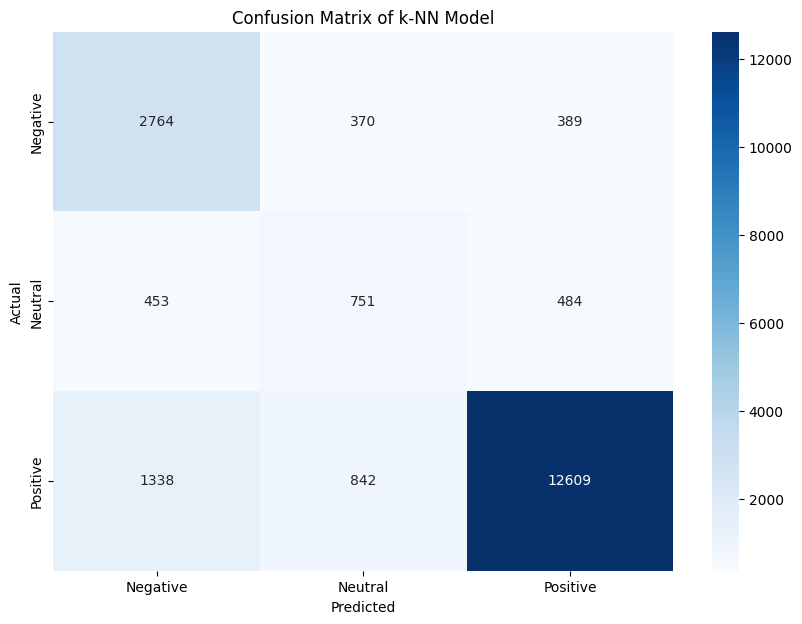

              precision    recall  f1-score   support

           0       0.61      0.78      0.68      3523
           1       0.38      0.44      0.41      1688
           2       0.94      0.85      0.89     14789

    accuracy                           0.81     20000
   macro avg       0.64      0.69      0.66     20000
weighted avg       0.83      0.81      0.81     20000



In [17]:
knn = KNeighborsClassifier(n_neighbors=1000)
knn.fit(ros_X_train, ros_y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(knn_pred, y_test)

print("Test accuracy: {:.2f}%".format(knn_acc * 100))
# Plot confusion matrix
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of k-NN Model')
plt.show()

# Print classification report
print(classification_report(y_test, knn_pred))


## MultinomialNB Model

In [18]:
# hyperparameter test
alpha_list = [0, 0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]

for a in alpha_list:
    mnb=MultinomialNB(alpha=a)
    mnb.fit(ros_X_train,ros_y_train)
    mnb_pred=mnb.predict(x_test)
    mnb_acc=accuracy_score(mnb_pred,y_test)
    print(f"Test accuracy of hyperparameter alpha = {a} : {mnb_acc * 100:.2f}%")

Test accuracy of hyperparameter alpha = 0 : 66.43%
Test accuracy of hyperparameter alpha = 0.01 : 76.81%
Test accuracy of hyperparameter alpha = 0.5 : 76.68%
Test accuracy of hyperparameter alpha = 1 : 76.38%
Test accuracy of hyperparameter alpha = 5 : 74.84%
Test accuracy of hyperparameter alpha = 10 : 74.33%
Test accuracy of hyperparameter alpha = 50 : 74.06%
Test accuracy of hyperparameter alpha = 100 : 74.67%
Test accuracy of hyperparameter alpha = 500 : 77.03%
Test accuracy of hyperparameter alpha = 1000 : 78.03%


Test accuracy: 77.96%


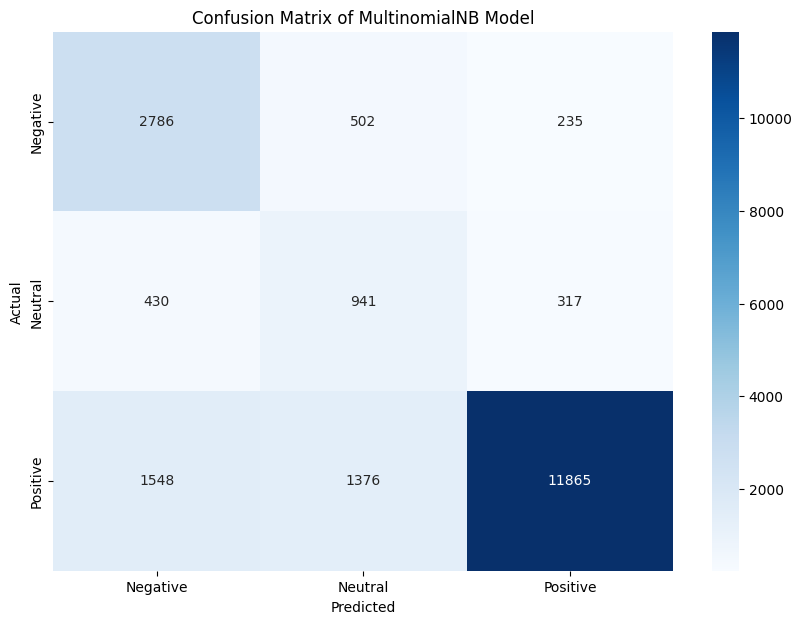

              precision    recall  f1-score   support

           0       0.58      0.79      0.67      3523
           1       0.33      0.56      0.42      1688
           2       0.96      0.80      0.87     14789

    accuracy                           0.78     20000
   macro avg       0.62      0.72      0.65     20000
weighted avg       0.84      0.78      0.80     20000



In [18]:
mnb=MultinomialNB(alpha=1000)
mnb.fit(ros_X_train,ros_y_train)
mnb_pred=mnb.predict(x_test)
mnb_acc=accuracy_score(mnb_pred,y_test)

print("Test accuracy: {:.2f}%".format(mnb_acc*100))
# Plot confusion matrix
cm = confusion_matrix(y_test, mnb_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of MultinomialNB Model')
plt.show()
print(classification_report(y_test,mnb_pred))

## LinearSVC

In [19]:
# hyperparameter test
c_list = [0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

for c in c_list:
    svc=LinearSVC(C=c)
    svc.fit(ros_X_train,ros_y_train)
    svc_pred=svc.predict(x_test)
    svc_acc=accuracy_score(svc_pred,y_test)
    print(f"Test accuracy of hyperparameter  c = {c} : {svc_acc * 100:.2f}%")

Test accuracy of hyperparameter  c = 0.01 : 81.03%
Test accuracy of hyperparameter  c = 0.1 : 81.43%
Test accuracy of hyperparameter  c = 0.5 : 80.99%
Test accuracy of hyperparameter  c = 1 : 80.64%
Test accuracy of hyperparameter  c = 5 : 79.03%
Test accuracy of hyperparameter  c = 10 : 78.41%
Test accuracy of hyperparameter  c = 50 : 77.72%
Test accuracy of hyperparameter  c = 100 : 77.55%


Test accuracy: 81.58%


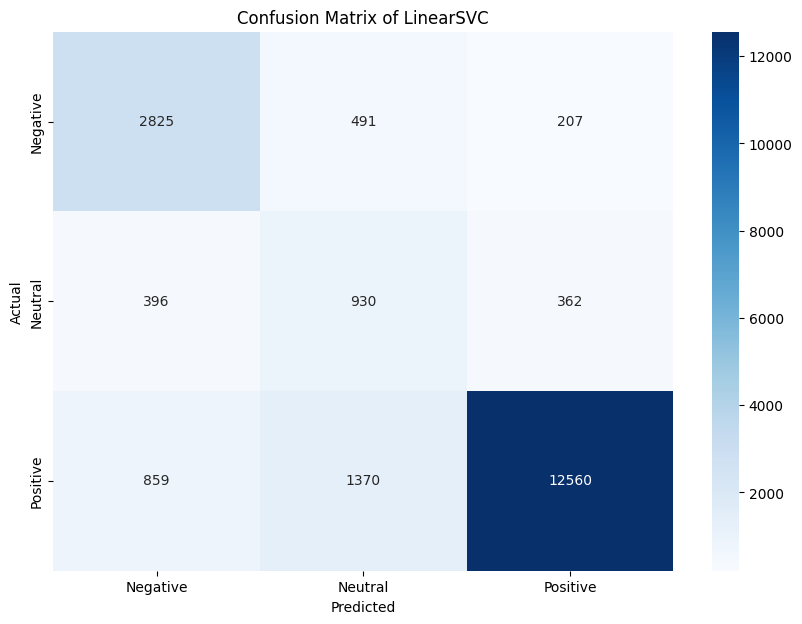

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      3523
           1       0.33      0.55      0.42      1688
           2       0.96      0.85      0.90     14789

    accuracy                           0.82     20000
   macro avg       0.66      0.73      0.69     20000
weighted avg       0.86      0.82      0.83     20000



In [20]:
svc=LinearSVC(C=0.1)
svc.fit(ros_X_train,ros_y_train)
svc_pred=svc.predict(x_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))
# Plot confusion matrix
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of LinearSVC')
plt.show()
print(classification_report(y_test,svc_pred))

## RandomForestClassifier

### This take a very long time to test
### And have vast output

In [22]:
# hyperparameter test
n_estimators_list = [10, 50, 100, 200]
max_depth_list = [None, 10, 20, 30]
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            for min_samples_leaf in min_samples_leaf_list:
                # Create the model with current hyperparameters
                rf = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=123
                )
                rf.fit(ros_X_train,ros_y_train)
                rf_pred=rf.predict(x_test)
                rf_acc=accuracy_score(rf_pred,y_test)
                print(f"Test accuracy {rf_acc * 100:.2f}% \n"
                      f"from hyperparameters\n"
                      f"n_estimators_list = {n_estimators}\n"
                      f"max_depth_list = {max_depth}\n"
                      f"min_samples_split_list = {min_samples_split}\n"
                      f"min_samples_leaf_list = {min_samples_leaf}\n")

Test accuracy 83.47% 
from hyperparameters
n_estimators_list = 10
max_depth_list = None
min_samples_split_list = 2
min_samples_leaf_list = 1

Test accuracy 81.97% 
from hyperparameters
n_estimators_list = 10
max_depth_list = None
min_samples_split_list = 2
min_samples_leaf_list = 2

Test accuracy 80.30% 
from hyperparameters
n_estimators_list = 10
max_depth_list = None
min_samples_split_list = 2
min_samples_leaf_list = 4

Test accuracy 83.85% 
from hyperparameters
n_estimators_list = 10
max_depth_list = None
min_samples_split_list = 5
min_samples_leaf_list = 1

Test accuracy 81.51% 
from hyperparameters
n_estimators_list = 10
max_depth_list = None
min_samples_split_list = 5
min_samples_leaf_list = 2

Test accuracy 80.30% 
from hyperparameters
n_estimators_list = 10
max_depth_list = None
min_samples_split_list = 5
min_samples_leaf_list = 4

Test accuracy 83.66% 
from hyperparameters
n_estimators_list = 10
max_depth_list = None
min_samples_split_list = 10
min_samples_leaf_list = 1

Test 

KeyboardInterrupt: 

Test accuracy 86.12% 
from hyperparameters
n_estimators_list = 100
max_depth_list = None
min_samples_split = 5
min_samples_leaf = 1

In [22]:
from sklearn.ensemble import RandomForestClassifier

Test accuracy: 86.39%


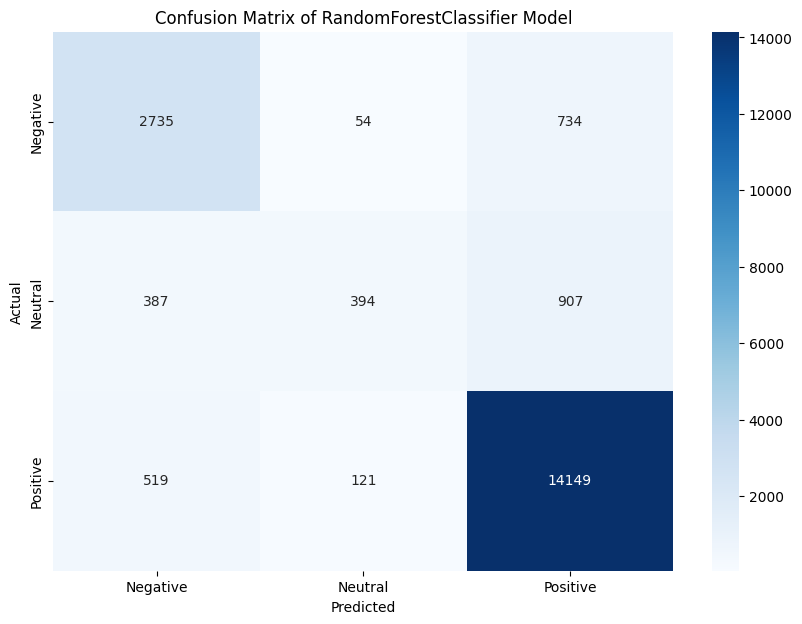

              precision    recall  f1-score   support

           0       0.75      0.78      0.76      3523
           1       0.69      0.23      0.35      1688
           2       0.90      0.96      0.93     14789

    accuracy                           0.86     20000
   macro avg       0.78      0.66      0.68     20000
weighted avg       0.85      0.86      0.85     20000



In [24]:
rf=RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=1)
rf.fit(ros_X_train,ros_y_train)
rf_pred=rf.predict(x_test)
rf_acc=accuracy_score(rf_pred,y_test)

print("Test accuracy: {:.2f}%".format(rf_acc*100))
# Plot confusion matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForestClassifier Model')
plt.show()
print(classification_report(y_test,rf_pred))